# **Used Car Price Prediction Project**

In [1]:
# mounting or making all Google Drive files accessible within the Colab notebook
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Used Car Finder Project(Anudip)/used_cars_dataset.csv'
df = pd.read_csv(path)

#Understanding Dataset


In [4]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [5]:
df.shape

(976, 20)

In [6]:
df.isnull().sum()

,0
Car_Name,0
Make,0
Model,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0


In [7]:
df.duplicated().sum()

62

In [8]:
df.columns

Index(['Car_Name', 'Make', 'Model', 'Make_Year', 'Color', 'Body_Type',
       'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type',
       'Fuel_Tank_Capacity(L)', 'Engine_Type', 'CC_Displacement',
       'Transmission', 'Transmission_Type', 'Power(BHP)', 'Torque(Nm)',
       'Mileage(kmpl)', 'Emission', 'Price'],
      dtype='object')

#Finding unique values in the dataset

In [9]:
unique_values = df.nunique()
print(unique_values)

Car_Name                 376
Make                      16
Model                     87
Make_Year                 12
Color                     15
Body_Type                  5
Mileage_Run              878
No_of_Owners               3
Seating_Capacity           5
Fuel_Type                  3
Fuel_Tank_Capacity(L)     21
Engine_Type              143
CC_Displacement           38
Transmission               5
Transmission_Type          2
Power(BHP)               105
Torque(Nm)                79
Mileage(kmpl)            164
Emission                   3
Price                    585
dtype: int64


INTEGER VALUE COLUMNS WHOSE UNIQUE VALUES AREN'T CALCULATED
* Car_Name
* Mileage_Run
* Fuel_Tank_Capacity(L)
* Engine_Type
* CC_Displacement
* Power(BHP)
* Torque(Nm)
* Mileage(kmpl)
* Price

In [10]:
print(sorted(df['Make'].unique()))

['Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Kia', 'MG Motors', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen']


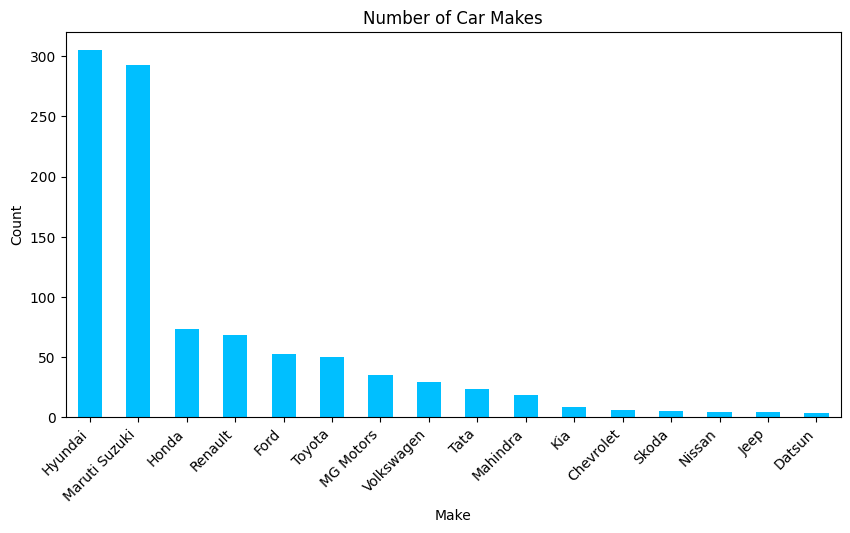

In [11]:
make_counts = df['Make'].value_counts()
make_counts.plot(kind='bar', color='deepskyblue', figsize=(10,5))
plt.title('Number of Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
print(sorted(df['Make_Year'].unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [13]:
df['Model'].unique()

array(['Ameo', 'i20 Active', 'WR-V', 'Kwid', 'Grand i10', 'Elite i20',
       'Brio', 'Harrier', 'Grand i10 Nios', 'Triber', 'Cruze', 'Venue',
       'Safari', 'Swift', 'Yaris', 'Punch', 'Duster', 'Celerio', 'Creta',
       'Etios Liva', 'i10', 'Swift Dzire', 'Verna', 'Baleno', 'Alto K10',
       'Amaze', 'New i20', 'Mobilio', 'Altroz', 'Ignis', 'City',
       'S-Presso', 'Dzire', 'TUV300', 'Eeco', 'Xcent', 'Ciaz',
       'Wagon R 1.0', 'New Santro 1.1', 'Vento', 'EcoSport', 'S-Cross',
       'Magnite', 'Polo', 'Etios', 'Compass', 'Alto 800', 'Tiago', 'Eon',
       'Lodgy', 'Jazz', 'Scorpio', 'Beat', 'Corolla Altis', 'Hector',
       'Seltos', 'Figo', 'Zest', 'Fluidic Verna 4S', 'Ertiga', 'Ritz',
       'Hector Plus', 'Kiger', 'Vitara Brezza', 'XUV500', 'A-Star',
       'Superb', 'i20', 'Nano GenX', 'XUV 300', 'Jetta', 'Rapid',
       'Redi-GO', 'Figo Aspire', 'Freestyle', 'Verna Transform', 'Alto',
       'GO', 'Santro Xing', 'Omni', 'Glanza', 'Wagon R 1.2',
       'Micra Active', 'Na

In [14]:
df['Color'].unique()

array(['silver', 'red', 'white', 'bronze', 'orange', 'grey', 'blue',
       'yellow', 'beige', 'brown', 'golden', 'black', 'maroon', 'purple',
       'green'], dtype=object)

In [15]:
df['Body_Type'].unique()

array(['sedan', 'crossover', 'suv', 'hatchback', 'muv'], dtype=object)

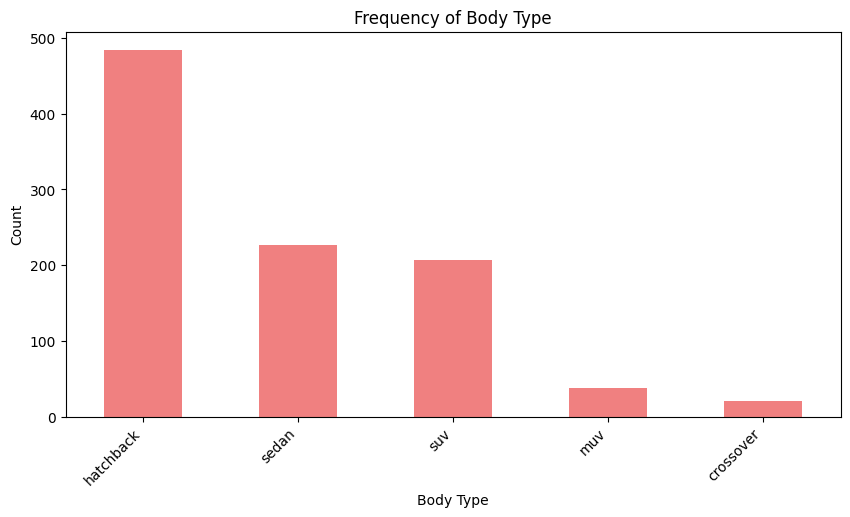

In [16]:
bodytype_counts = df['Body_Type'].value_counts()
bodytype_counts.plot(kind='bar', color='lightcoral', figsize=(10,5))
plt.title('Frequency of Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
df['No_of_Owners'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [18]:
print(sorted(df['Seating_Capacity'].unique()))

[4, 5, 6, 7, 8]


In [19]:
df['Fuel_Type'].unique()

array(['diesel', 'petrol', 'petrol+cng'], dtype=object)

In [20]:
print(sorted(df['Fuel_Tank_Capacity(L)'].unique()))

[15, 24, 27, 28, 32, 35, 36, 37, 40, 41, 42, 43, 44, 45, 48, 50, 52, 55, 60, 66, 70]


In [21]:
print(sorted(df['Transmission'].unique()))

['4-Speed', '5-Speed', '6-Speed', '7-Speed', 'CVT']


In [22]:
print(sorted(df['Transmission_Type'].unique()))

['Automatic', 'Manual']


In [23]:
print(sorted(df['Emission'].unique()))

['BS III', 'BS IV', 'BS V']


#Issues and their solution in the dataset

1. Interger values are in object format like No_of_Owner, Mileage_Run, Mileage & Price
2. Transforming column no_of_Owners, mileage into numerical value
3. Removing transmission of value "CVT" as they are only 3 rows and tranforming that data into integer format and renaming the col as 'Transmission(Speed)'
4. Deleting duplicate values, i.e., 62 rows

#Data Cleaning

In [24]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [25]:
# Removing "Car_Name" column
df.drop('Car_Name', axis=1, inplace=True)

In [26]:
df.shape

(914, 19)

#Data Preprocessing

In [27]:
#Removing "CVT" Transmission value]
df = df[df['Transmission'] != 'CVT']

In [28]:
# Transforming object type column to numerical type column
df['No_of_Owners'] = df['No_of_Owners'].map({'1st': 1, '2nd': 2, '3rd': 3})
df['Mileage_Run'] = df['Mileage_Run'].str.replace(',', '').astype(float)
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [29]:
df['Transmission(Speed)'] = df['Transmission'].str.extract(r'(\d+)').astype(int)

In [30]:
df.drop('Transmission', axis=1, inplace=True)

In [31]:
# Value in Mileage column of row number 322 and 446 contains value as "BS IV" and row number 408 contains value as "105 bhp @ 4400 RPM" hence we were unable to convert that
# column into int value
# Now we will remove the whole rows because we of less parameters to calculate it's mileage in kmpl
df[df['Mileage(kmpl)'] == 'BS IV']

,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price,Transmission(Speed)
322,Maruti Suzuki,Baleno,2019,blue,hatchback,30420.0,1,5,diesel,37,ddis diesel engine,1248,Automatic,74.0,190.0,BS IV,BS V,883000,5
446,Maruti Suzuki,Baleno,2019,blue,hatchback,37942.0,1,5,diesel,37,ddis diesel engine,1248,Automatic,74.0,190.0,BS IV,BS V,847000,5


In [32]:
df.drop([322, 446], axis=0, inplace=True)

In [33]:
df[df['Mileage(kmpl)'] == '105 bhp @ 4400 RPM']

,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price,Transmission(Speed)
408,Skoda,Rapid,2012,white,sedan,93981.0,2,5,diesel,55,4 cylinder inline diesel engine,1598,Manual,105.0,250.0,105 bhp @ 4400 RPM,BS III,436000,5


In [34]:
df.drop([408], axis=0, inplace=True)

In [35]:
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)

In [36]:
df.shape

(908, 19)

In [37]:
df[df['Price'] > 2e6]

,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price,Transmission(Speed)
13,Tata,Safari,2021,grey,suv,15059.0,1,7,diesel,50,Kryotec 2.0 L Turbocharged Engine,1956,Automatic,167.67,350.0,17.00,BS IV,2100000,6
234,Skoda,Superb,2019,black,sedan,9686.0,1,5,petrol,66,"Turbocharged petrol engine, in-line, liquid co...",1798,Automatic,177.00,250.0,14.67,BS V,2941000,7
627,MG Motors,Hector,2020,red,suv,30234.0,1,5,diesel,60,FWD,1596,Manual,167.68,350.0,17.41,BS IV,2019000,5
629,MG Motors,Hector,2020,red,suv,30234.0,1,5,diesel,60,FWD,1956,Manual,167.68,350.0,17.41,BS IV,2019000,6


In [38]:
#While finding outlier manually, i got 627, 629 col as same so removing row 629 as it is having year "1596"(not common value)
df.drop([629], axis=0, inplace=True)

In [41]:
# removing row number 13, 229, 590, having prices more than 21 lakhs making them outlier
df.drop([13, 234, 627], axis=0, inplace=True)

Doing Statistical Measures to know dataset more

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 975
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   904 non-null    object 
 1   Model                  904 non-null    object 
 2   Make_Year              904 non-null    int64  
 3   Color                  904 non-null    object 
 4   Body_Type              904 non-null    object 
 5   Mileage_Run            904 non-null    float64
 6   No_of_Owners           904 non-null    int64  
 7   Seating_Capacity       904 non-null    int64  
 8   Fuel_Type              904 non-null    object 
 9   Fuel_Tank_Capacity(L)  904 non-null    int64  
 10  Engine_Type            904 non-null    object 
 11  CC_Displacement        904 non-null    int64  
 12  Transmission_Type      904 non-null    object 
 13  Power(BHP)             904 non-null    float64
 14  Torque(Nm)             904 non-null    float64
 15  Mileage(kmp

In [43]:
df.describe()

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm),Mileage(kmpl),Price,Transmission(Speed)
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000
mean,2016.867257,41865.274336,1.162611,5.100664,41.894912,1280.876106,89.676781,139.732743,19.543540,7.137500e+05,5.161504
std,2.809979,24433.007200,0.381023,0.458511,7.831915,271.213083,24.121326,61.657816,2.707023,3.336523e+05,0.496299
min,2011.000000,1117.000000,1.000000,4.000000,15.000000,624.000000,34.000000,48.000000,10.400000,1.880000e+05,4.000000
25%,2015.000000,22676.750000,1.000000,5.000000,35.000000,1197.000000,74.000000,109.000000,17.570000,4.650000e+05,5.000000
50%,2017.000000,38206.000000,1.000000,5.000000,42.000000,1197.000000,82.000000,114.000000,19.020000,6.505000e+05,5.000000
75%,2019.000000,58706.750000,1.000000,5.000000,45.000000,1496.000000,103.250000,154.000000,21.062500,8.580000e+05,5.000000
max,2022.000000,99495.000000,3.000000,8.000000,70.000000,2179.000000,170.630000,380.000000,31.190000,1.984000e+06,7.000000


In [44]:
df.shape

(904, 19)

#Exploratory Data Analysis (EDA)


In [45]:
# Using Pandas Profiling latest package ydata-profiling for EDA
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=abcd87359120b2c7792a92030d293b93130613f08ee1179d3c0396fd26426cfe
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [46]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

In [47]:
# Removing rows with Seating_Capacity of 4 or 6
df = df[(df['Seating_Capacity'] != 4) & (df['Seating_Capacity'] != 6)]

In [48]:
df = df[(df['Fuel_Type'] != 'petrol+cng')]

In [49]:
df.drop('Fuel_Tank_Capacity(L)', axis=1, inplace=True)

In [50]:
df.drop('CC_Displacement', axis=1, inplace=True)

In [51]:
df.drop('Power(BHP)', axis=1, inplace=True)

In [52]:
df.drop('Torque(Nm)', axis=1, inplace=True)

In [53]:
df.drop('Transmission(Speed)', axis=1, inplace=True)

In [54]:
df.sample(3)

,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Engine_Type,Transmission_Type,Mileage(kmpl),Emission,Price
485,Hyundai,Elite i20,2016,blue,hatchback,94389.0,1,5,petrol,Kappa VTVT Petrol Engine,Manual,18.60,BS IV,568000
925,Maruti Suzuki,Baleno,2019,silver,hatchback,25418.0,1,5,petrol,1.2L VVT Engine,Manual,21.01,BS V,731000
352,Maruti Suzuki,Swift Dzire,2012,black,sedan,61885.0,1,5,petrol,K Series VVT Engine,Manual,19.10,BS IV,457000


In [55]:
df.reset_index(drop=True, inplace=True)

In [56]:
# String dataset at a particular location in csv format
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Used Car Finder Project(Anudip)/Cleaned Car Dataset.csv', index = False)

# **Visualizations**

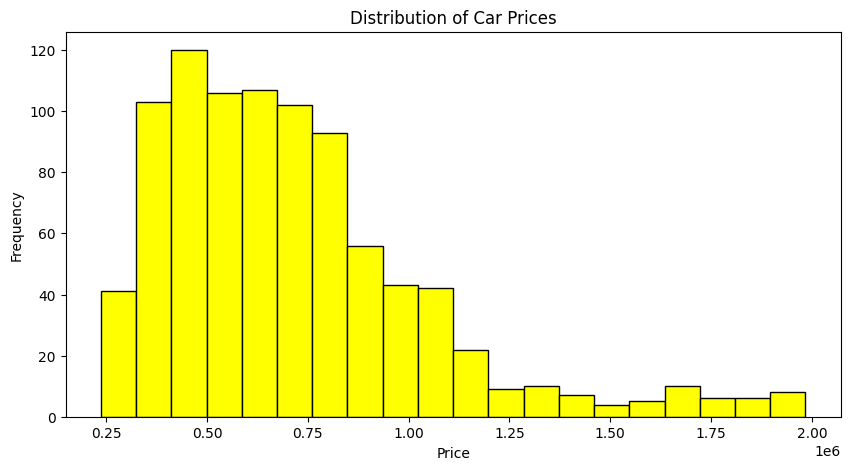

In [57]:
# Histogram representing Car Prices
plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Skewness will be removed while we will be working with Random Forest Algorithm

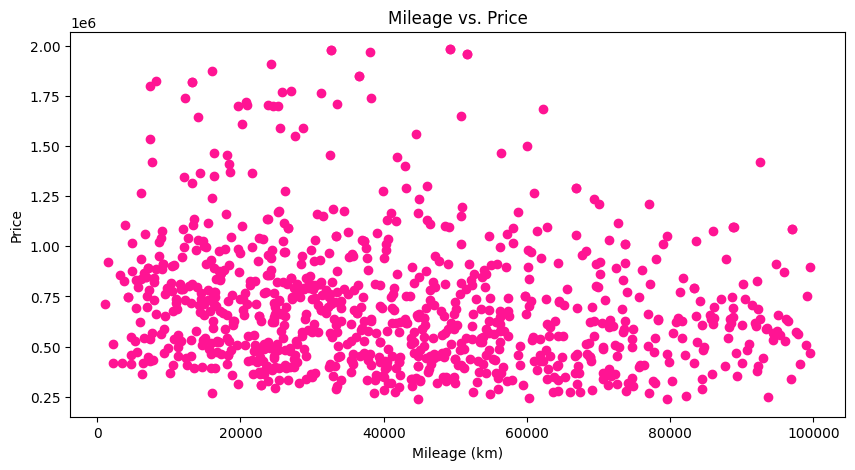

In [58]:
# Scatter Plot for Mileage vs. Price
plt.figure(figsize=(10, 5))
plt.scatter(df['Mileage_Run'], df['Price'], color='deeppink')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.show()

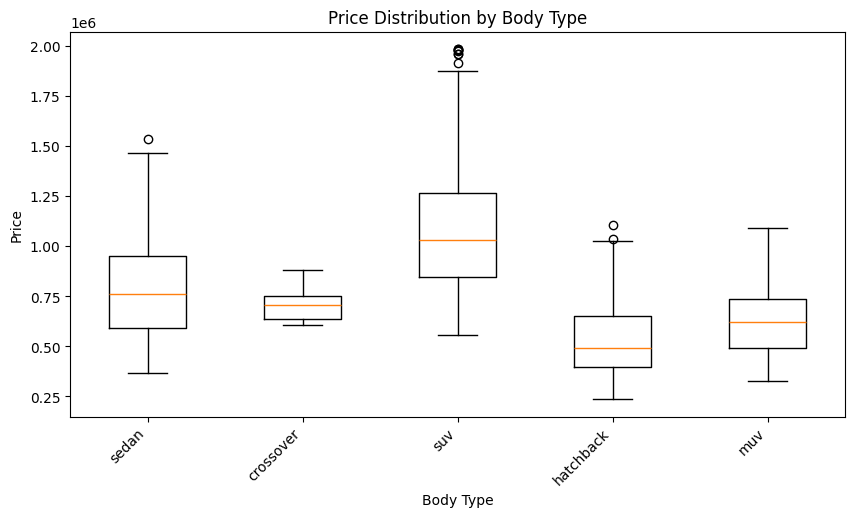

In [59]:
# Box Plot for Price by Body Type
body_types = df['Body_Type'].unique()
price_data = [df[df['Body_Type'] == body_type]['Price'] for body_type in body_types]
plt.figure(figsize=(10, 5))
plt.boxplot(price_data, labels=body_types)
plt.title('Price Distribution by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

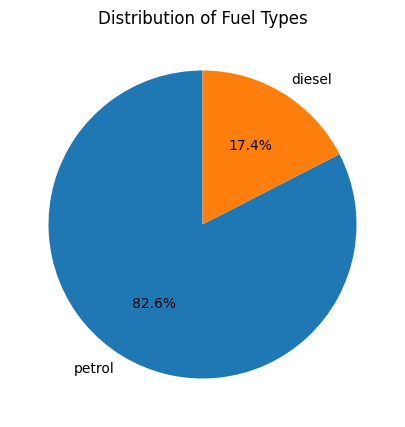

In [60]:
# Pie Chart showing Fuel Types
fuel_type_counts = df['Fuel_Type'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(fuel_type_counts.values, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')
plt.show()

In [61]:
print(df.columns)
df.shape

Index(['Make', 'Model', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Engine_Type',
       'Transmission_Type', 'Mileage(kmpl)', 'Emission', 'Price'],
      dtype='object')


(900, 14)

# Random Forest Regressor

Importing necessary libraries


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Define features and target

In [63]:
X = df[['Make', 'Model', 'Make_Year', 'Fuel_Type', 'Mileage_Run']]
y = df['Price']

Split data and reset index to ensure alignment

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Make', 'Model', 'Fuel_Type']),
        ('num', StandardScaler(), ['Make_Year', 'Mileage_Run'])
    ],
    remainder='passthrough'  # Keeps other columns if there are any
)

Create a Pipeline with ColumnTransformer and RandomForestRegressor

In [65]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

Fit the pipeline on the training data

In [79]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model',
                                                   'Fuel_Type']),
                                                 ('num', StandardScaler(),
                                                  ['Make_Year',
                                                   'Mileage_Run'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Predict on the test data

In [67]:
y_pred = pipeline.predict(X_test)



---
# Solving the issue of unequal datashape of X_train and y_train
I have used One Hot Encoder on the dataset but that was causing issue like unequal rows in test and training data and indexing issues so we have done

* Index Reset: Reset indices on X_train, X_test, y_train, and y_test after the split to ensure proper alignment.

* Concatenation Consistency: Reset index again after dropping categorical columns in X_train and X_test before concatenating with the encoded DataFrames.

Even after doing this, the dataset was having issues, hence we adopted pipeline which resolved the issues

In [ ]:
# # Define features and target
# X = df[['Make', 'Model', 'Make_Year', 'Fuel_Type', 'Mileage_Run']]
# y = df['New_price']

# # Split data and reset index to ensure alignment
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

# # Define and fit the encoder on categorical features in the training set
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# categorical_features = ['Make', 'Model', 'Fuel_Type']
# encoder.fit(X_train[categorical_features])

# # Transform the categorical columns and create DataFrames
# X_train_encoded = encoder.transform(X_train[categorical_features])
# X_test_encoded = encoder.transform(X_test[categorical_features])

# # Convert to DataFrames and reset index to align with X_train and X_test
# X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
# X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# # Concatenate with numerical features in X_train and X_test
# X_train_final = pd.concat([X_train.drop(categorical_features, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)
# X_test_final = pd.concat([X_test.drop(categorical_features, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

# # Verify that shapes match
# print("Shape of X_train_final:", X_train_final.shape)
# print("Shape of y_train:", y_train.shape)

# # Train the model
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_regressor.fit(X_train_final, y_train)

# # Predict on the test data
# y_pred = rf_regressor.predict(X_test_final)



---



In [80]:
scores = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
  # Create a RandomForestRegressor object
  rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

  pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

  # Train the model on the training data
  pipe.fit(X_train, y_train)

  # Predict on the test data
  y_pred = pipe.predict(X_test)

  # Calculate evaluation metrics
  r2 = r2_score(y_test, y_pred)

  scores.append(r2)

In [81]:
np.argmax(scores)

555

In [82]:
scores[np.argmax(scores)]

0.957566923726376

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = np.argmax(scores))
# Create a RandomForestRegressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)

In [84]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"R-squared: {r2}")

R-squared: 0.957566923726376



# Deployment

In [86]:
!pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=0ea15bf8a220fe479276d539131578ed41736e9d4038f129f58f2b969179d2ce
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [87]:
import pickle

In [89]:
pickle.dump(pipeline, open('/content/drive/MyDrive/Colab Notebooks/Used Car Finder Project(Anudip)/RandomForestModel.pkl', 'wb'))

In [90]:
pipeline.predict(pd.DataFrame([['Hyundai', 'i20 Active', '2016', 'petrol', 20305]], columns = ['Make', 'Model', 'Make_Year', 'Fuel_Type', 'Mileage_Run']))

array([671420.])